# Feature Maps Clustering Pt.2  

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.backend import clear_session

from tensorflow import config


physical_devices = config.list_physical_devices('GPU')
config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

import numpy as np
import pickle

from stylegan import StyleGAN_G


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [37]:
model = StyleGAN_G(resolution=1024)

all_weights = pickle.load(open('gs_weights_ffhq.pkl', 'rb'))
print('Weights loaded to memory.')

from stylegan import copy_weights_to_keras_model

copy_weights_to_keras_model(model.model_mapping, all_weights, console=True)
copy_weights_to_keras_model(model.model_synthesis, all_weights, console=True)
model.copy_weights(all_weights)

rnd = np.random.RandomState(28526)
latents = rnd.randn(1, 512)

Model created.
Weights loaded to memory.
.........Total number of parameters copied: 2101760
..........................................................................................Total number of parameters copied: 26381651


In [25]:
clusters = []
for i in range(21):
    if i<8:
        shape = 2**(int(i/2)+2)
        if i<2:
            cluster_type = 'affinityCluster'
        else:
            cluster_type = 'vggCluster'
        clusters.append(pickle.load( open( f"./clustered_maps/labels_{shape}x{shape}_{i}_{cluster_type}_8.p", "rb" ) ))
    else:
        clusters.append([])

In [28]:
operations = [{'resolution':4,
               'install_after':'Conv0_up',
               'layers':[]
               },
              {'resolution':4,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':8,
                'install_after':'Conv0_up',
                'layers':[]
               },
              {'resolution':8,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':16,
                'install_after':'Conv0_up',
                'layers':[{'operation':'scale',
                           'name':'21',
                           'scale':0,
                           'with_norm':True,
                           'clusters':[0,7]}]
               },
              {'resolution':16,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':32,
                'install_after':'Conv0_up',
                'layers':[]
               },
              {'resolution':32,
                'install_after':'Conv1',
                'layers':[]
               },
              ]

operation: scale: 16 -> 8
operation applied to 85 layers
Synthesis network rebuilt and loaded.
operation: scale: 16 -> 8
operation applied to 85 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: scale: 16 -> 12
operation applied to 85 layers
Synthesis network rebuilt and loaded.
operation: scale: 16 -> 12
operation applied to 85 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: scale: 16 -> 16
operation applied to 85 layers
Synthesis network rebuilt and loaded.
operation: scale: 16 -> 16
operation applied to 85 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: scale: 16 -> 20
operation applied to 85 layers
Synthesis network rebuilt and loaded.
operation: scale: 16 -> 20
operation applied to 85 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: scale: 16 -> 22
operation applied to 85 layers
Synthesis network rebuilt and loaded.
operation: scale: 16 -> 22
operation applied to 85 layers
(1, 1024, 1024, 3) 0.0 1.0


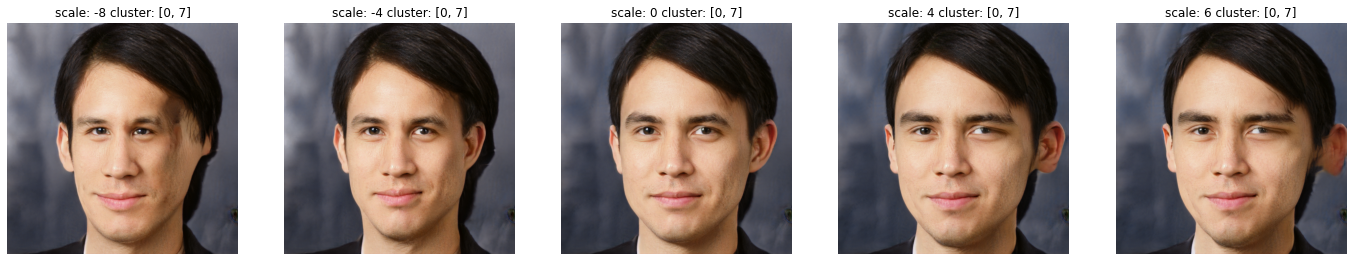

In [21]:
layer_indexes = [4,4,4,4,4]
factors=[-8,-4,0,4,6]

n=5
fig,axs = plt.subplots(1,n,figsize=(24,6))
count = 0

for i in range(n):
    operations[layer_indexes[i]]['layers'][0]['scale'] = factors[i]
    operations[layer_indexes[i]]['layers'][0]['operation'] = 'scale'
    model.rebuild_operations(operations,clusters)
    img = model.generate_from_vector_fast(latents,is_visualize=False)
    
    axs[count].axis('off')
    axs[count].title.set_text(f"scale: {factors[i]} cluster: {operations[layer_indexes[i]]['layers'][0]['clusters']}")
    axs[count].imshow(img)
    
    operations[layer_indexes[i]]['layers'][0]['scale'] = 0
    operations[layer_indexes[i]]['layers'][0]['operation'] = 'none'
    count += 1
    clear_session()

operation: mean_filter
operation applied to 85 layers
Synthesis network rebuilt and loaded.
operation: mean_filter
operation applied to 85 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: mean_filter
operation applied to 240 layers
Synthesis network rebuilt and loaded.
operation: mean_filter
operation applied to 240 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: mean_filter
operation applied to 280 layers
Synthesis network rebuilt and loaded.
operation: mean_filter
operation applied to 280 layers
(1, 1024, 1024, 3) 0.0 1.0
operation: mean_filter
operation applied to 232 layers
Synthesis network rebuilt and loaded.
operation: mean_filter
operation applied to 232 layers
(1, 1024, 1024, 3) 0.0 1.0


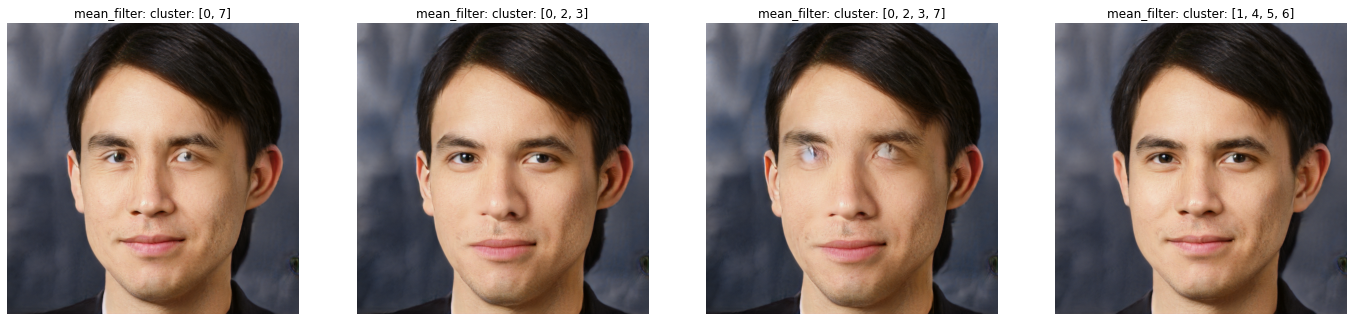

In [33]:
layer_indexes = [4,4,4,4]
clusters_index = [[0,7],[0,2,3],[0,2,3,7],[1,4,5,6]]
factors=[3,3,3,3]

n=4
fig,axs = plt.subplots(1,n,figsize=(24,6))
count = 0

for i in range(n):
    operations[layer_indexes[i]]['layers'][0]['filter_shape'] = factors[i]
    operations[layer_indexes[i]]['layers'][0]['operation'] = 'mean_filter'
    operations[layer_indexes[i]]['layers'][0]['clusters'] = clusters_index[i]
    model.rebuild_operations(operations,clusters)
    img = model.generate_from_vector_fast(latents,is_visualize=False)
    
    axs[count].axis('off')
    axs[count].title.set_text(f"mean_filter: cluster: {operations[layer_indexes[i]]['layers'][0]['clusters']}")
    axs[count].imshow(img)
    
    operations[layer_indexes[i]]['layers'][0]['filter_shape'] = 3
    operations[layer_indexes[i]]['layers'][0]['operation'] = 'none'
    operations[layer_indexes[i]]['layers'][0]['clusters'] = []
    count += 1
    clear_session()

In [40]:
operations = [{'resolution':4,
               'install_after':'Conv0_up',
               'layers':[]
               },
              {'resolution':4,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':8,
                'install_after':'Conv0_up',
                'layers':[]
               },
              {'resolution':8,
                'install_after':'Conv1',
                'layers':[{'operation':'sharpen',
                           'name':'01',
                           'sharpen_factor':3,
                           'with_norm':True,
                           'clusters':[1,5,6]}]
               },
              {'resolution':16,
                'install_after':'Conv0_up',
                'layers':[{'operation':'erosion',
                           'name':'01',
                           'with_norm':True,
                           'clusters':[1,5,6]},
                          
                          {'operation':'mean_filter',
                            'name':'02',
                            'with_norm':True,
                            'filter_shape':5,
                            'clusters':[3]},
                          {'operation':'mean_filter',
                            'name':'02',
                            'with_norm':True,
                            'filter_shape':3,
                            'clusters':[2,3]},
                          {'operation':'scale',
                            'name':'02',
                            'with_norm':True,
                            'scale':-6,
                            'clusters':[3,7]},
                          {'operation':'scale',
                           'name':'02',
                           'scale':8,
                           'with_norm':True,
                           'clusters':[1,5,6]},
                          {'operation':'erosion',
                           'name':'03',
                           'with_norm':True,
                           'clusters':[1,5,6]},
                          {'operation':'erosion',
                           'name':'03',
                           'with_norm':True,
                           'clusters':[1,5,6]},
                          {'operation':'erosion',
                           'name':'03',
                           'with_norm':True,
                           'clusters':[4]},
                          {'operation':'dilation',
                            'name':'02',
                            'with_norm':True,
                            'clusters':[3,7]},
                          {'operation':'scale',
                           'name':'02',
                           'scale':-4,
                           'with_norm':True,
                           'clusters':[3,7]},
                          {'operation':'scale',
                           'name':'02',
                           'scale':-8,
                           'with_norm':True,
                           'clusters':[0]},
                          ]
               },
              {'resolution':16,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':32,
                'install_after':'Conv0_up',
                'layers':[]
               },
              {'resolution':32,
                'install_after':'Conv1',
                'layers':[]
               },
              ]

operation: sharpen 3
(512, 8, 8, None)
operation applied to 227 layers
operation: erosion
operation applied to 170 layers
operation: mean_filter
operation applied to 116 layers
operation: mean_filter
operation applied to 195 layers
operation: scale: 16 -> 10
operation applied to 156 layers
operation: scale: 16 -> 24
operation applied to 170 layers
operation: erosion
operation applied to 170 layers
operation: erosion
operation applied to 170 layers
operation: erosion
operation applied to 62 layers
operation: dilation
operation applied to 156 layers
operation: scale: 16 -> 12
operation applied to 156 layers
operation: scale: 16 -> 8
operation applied to 45 layers
Synthesis network rebuilt and loaded.
operation: sharpen 3
(512, 8, 8, None)
operation applied to 227 layers
operation: erosion
operation applied to 170 layers
operation: mean_filter
operation applied to 116 layers
operation: mean_filter
operation applied to 195 layers
operation: scale: 16 -> 10
operation applied to 156 layers
o

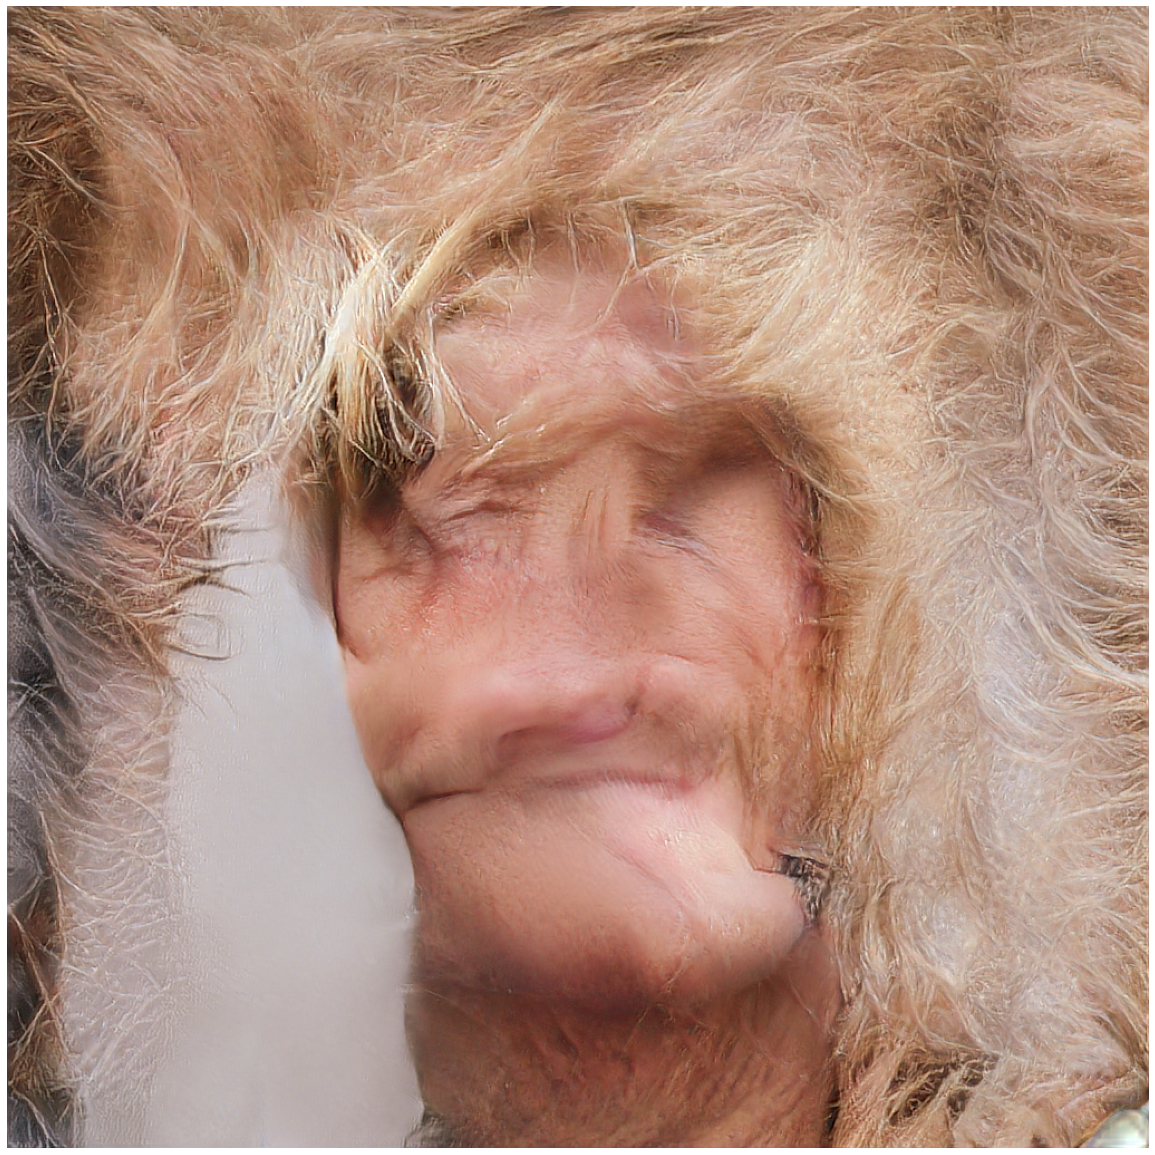

In [41]:
model.rebuild_operations(operations,clusters)
img = model.generate_from_vector_fast(latents,is_visualize=True)

In [ ]:
operations = [{'resolution':4,
               'install_after':'Conv0_up',
               'layers':[]
               },
              {'resolution':4,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':8,
                'install_after':'Conv0_up',
                'layers':[]
               },
              {'resolution':8,
                'install_after':'Conv1',
                'layers':[{'operation':'sharpen',
                           'name':'01',
                           'sharpen_factor':3,
                           'with_norm':True,
                           'clusters':[1,5,6]}]
               },
              {'resolution':16,
                'install_after':'Conv0_up',
                'layers':[{'operation':'erosion',
                           'name':'01',
                           'with_norm':True,
                           'clusters':[1,5,6]},
                          {'operation':'mean_filter',
                            'name':'02',
                            'with_norm':True,
                            'filter_shape':5,
                            'clusters':[3]},
                          {'operation':'mean_filter',
                            'name':'02',
                            'with_norm':True,
                            'filter_shape':3,
                            'clusters':[2,3]},
                          {'operation':'scale',
                            'name':'02',
                            'with_norm':True,
                            'scale':-6,
                            'clusters':[3,7]},
                          {'operation':'scale',
                           'name':'02',
                           'scale':8,
                           'with_norm':True,
                           'clusters':[1,5,6]},
                          {'operation':'erosion',
                           'name':'03',
                           'with_norm':True,
                           'clusters':[1,4,5,6]},
                          {'operation':'dilation',
                            'name':'02',
                            'with_norm':True,
                            'clusters':[3,7]},
                          {'operation':'scale',
                           'name':'02',
                           'scale':-4,
                           'with_norm':True,
                           'clusters':[3,7]},
                          {'operation':'scale',
                           'name':'02',
                           'scale':-8,
                           'with_norm':True,
                           'clusters':[0]},
                          ]
               },
              {'resolution':16,
                'install_after':'Conv1',
                'layers':[]
               },
              {'resolution':32,
                'install_after':'Conv0_up',
                'layers':[]
               },
              {'resolution':32,
                'install_after':'Conv1',
                'layers':[]
               },
              ]